In [71]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import axes

In [27]:
# carico i csv
df1=pd.read_csv('readability_valeria1.csv', delimiter=',') # generato con readability_definitivo_csv
df2=pd.read_csv('text_analysis.csv') # generato con text analysis.py

In [28]:
# nel df1 c'era una colonna che non volevo (strana, l'ho tolta)
df1.drop(columns='Unnamed: 0', inplace=True)
df1.head()

,Title,Year,Decade,House,Category,Flesch_Kincaid_score,flesch_score,dale_chall_score,spache_score,ari_score,...,smog_score,linsear_write_score,Flesch_Kincaid_gl,flesch_gl,dale_chall_gl,spache_gl,ari_gl,coleman_liau_gl,smog_gl,linsear_write_gl
0,Ice Age Dawn of the Dinosaurs,2009,2000,Blue,Animation,0.260942,0.645334,0.105894,0.134395,0.421893,...,0.279310,0.131736,1,5,10,4,0,1,6,2
1,Horton Hears a Who,2008,2000,Blue,Animation,0.307507,0.576629,0.189541,0.186205,0.425051,...,0.366189,0.155590,2,5,12,5,0,1,6,2
2,Ice Age 2-The Meltdown,2006,2000,Blue,Animation,0.266583,0.645533,0.089133,0.096916,0.426646,...,0.285396,0.141946,1,5,8,4,0,1,6,2
3,Ice Age,2002,2000,Blue,Animation,0.242643,0.688093,0.095904,0.112623,0.406044,...,0.256562,0.138007,1,5,10,4,0,1,6,2
4,Epic,2013,2010,Blue,Animation,0.261901,0.677384,0.079021,0.095754,0.421754,...,0.299190,0.164184,1,5,8,4,0,1,6,2


In [31]:
df2

,Title,House,Decade,Year,Category,Movie_len,Avg_WordLen_Movie,Avg_PhrLen_Movie,Avg_WordLen_Phrase,Num_Adjectives,Num_Adverbs,Short_Phrases%
0,Chicken Run,Aardman,2000,2000,Animation,1025,3.90,4.30,5.11,237,344,0.487805
1,Flushed Away,Aardman,2000,2006,Animation,2413,3.86,6.35,4.37,890,1408,0.124327
2,Wallace And Gromit In The Curse Of The Were-Ra...,Aardman,2000,2005,Animation,465,4.39,4.80,5.42,176,163,1.075269
3,A Shaun the Sheep Movie Farmageddon,Aardman,2010,2019,Animation,228,3.25,1.02,6.49,0,1,1.754386
4,Arthur Christmas,Aardman,2010,2011,Animation,1877,3.91,4.06,5.40,401,558,2.717102
...,...,...,...,...,...,...,...,...,...,...,...,...
429,Van Helsing The London Assignment,Universal,2000,2004,Animation,343,3.97,5.16,5.00,111,129,0.583090
430,Curious George 3 Back to the Jungle,Universal,2010,2015,Animation,911,3.91,4.88,4.81,235,325,0.658617
431,Curious George Royal Monkey,Universal,2010,2019,Animation,1230,3.84,4.36,4.87,328,378,4.471545
432,The Land Before Time XIV-Journey Of The Brave,Universal,2010,2016,Animation,1095,3.79,4.49,5.16,234,415,1.278539


In [29]:
# per fare il merge dei df anche anno in df2 doveva essere numerico
df2['Year'] = pd.to_numeric(df2['Year'])

In [34]:
# normalizzazione (attenzione, df1 già normalizzato, quindi normalizzo solo df2)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df2[['Movie_len', 'Avg_WordLen_Movie', 'Avg_PhrLen_Movie', 'Avg_WordLen_Phrase','Num_Adjectives','Num_Adverbs','Short_Phrases%']] = min_max_scaler.fit_transform(df2[['Movie_len', 'Avg_WordLen_Movie', 'Avg_PhrLen_Movie', 'Avg_WordLen_Phrase','Num_Adjectives','Num_Adverbs','Short_Phrases%']])
df2

,Title,House,Decade,Year,Category,Movie_len,Avg_WordLen_Movie,Avg_PhrLen_Movie,Avg_WordLen_Phrase,Num_Adjectives,Num_Adverbs,Short_Phrases%
0,Chicken Run,Aardman,2000,2000,Animation,0.205044,0.135699,0.346723,0.200000,0.236763,0.244318,0.027565
1,Flushed Away,Aardman,2000,2006,Animation,0.509430,0.127349,0.563425,0.090370,0.889111,1.000000,0.007025
2,Wallace And Gromit In The Curse Of The Were-Ra...,Aardman,2000,2005,Animation,0.082237,0.237996,0.399577,0.245926,0.175824,0.115767,0.060761
3,A Shaun the Sheep Movie Farmageddon,Aardman,2010,2019,Animation,0.030263,0.000000,0.000000,0.404444,0.000000,0.000710,0.099137
4,Arthur Christmas,Aardman,2010,2011,Animation,0.391886,0.137787,0.321353,0.242963,0.400599,0.396307,0.153538
...,...,...,...,...,...,...,...,...,...,...,...,...
429,Van Helsing The London Assignment,Universal,2000,2004,Animation,0.055482,0.150313,0.437632,0.183704,0.110889,0.091619,0.032949
430,Curious George 3 Back to the Jungle,Universal,2010,2015,Animation,0.180044,0.137787,0.408034,0.155556,0.234765,0.230824,0.037217
431,Curious George Royal Monkey,Universal,2010,2019,Animation,0.250000,0.123173,0.353066,0.164444,0.327672,0.268466,0.252678
432,The Land Before Time XIV-Journey Of The Brave,Universal,2010,2016,Animation,0.220395,0.112735,0.366808,0.207407,0.233766,0.294744,0.072248


In [41]:
# merge dei df
df= df1.merge(df2, left_on=('Title', 'Year','Decade', 'House','Category'), right_on=('Title', 'Year', 'Decade', 'House', 'Category'), copy=False)
df

,Title,Year,Decade,House,Category,Flesch_Kincaid_score,flesch_score,dale_chall_score,spache_score,ari_score,...,coleman_liau_gl,smog_gl,linsear_write_gl,Movie_len,Avg_WordLen_Movie,Avg_PhrLen_Movie,Avg_WordLen_Phrase,Num_Adjectives,Num_Adverbs,Short_Phrases%
0,Ice Age Dawn of the Dinosaurs,2009,2000,Blue,Animation,0.260942,0.645334,0.105894,0.134395,0.421893,...,1,6,2,0.228947,0.110647,0.339323,0.158519,0.277722,0.290483,0.049831
1,Horton Hears a Who,2008,2000,Blue,Animation,0.307507,0.576629,0.189541,0.186205,0.425051,...,1,6,2,0.330921,0.154489,0.334038,0.217778,0.398601,0.360085,0.141358
2,Ice Age 2-The Meltdown,2006,2000,Blue,Animation,0.266583,0.645533,0.089133,0.096916,0.426646,...,1,6,2,0.210526,0.112735,0.366808,0.177778,0.249750,0.267756,0.048435
3,Ice Age,2002,2000,Blue,Animation,0.242643,0.688093,0.095904,0.112623,0.406044,...,1,6,2,0.180482,0.102296,0.362579,0.161481,0.223776,0.223722,0.037136
4,Epic,2013,2010,Blue,Animation,0.261901,0.677384,0.079021,0.095754,0.421754,...,1,6,2,0.305702,0.100209,0.391121,0.142222,0.353646,0.450994,0.156120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Goosebumps Haunted Halloween,2018,2010,Sony,Animation,0.280113,0.613753,0.142197,0.159954,0.400433,...,1,6,2,0.351316,0.121086,0.313953,0.205926,0.351648,0.377131,0.086833
208,Hotel Transylvania 3 Summer Vacation,2018,2010,Sony,Animation,0.316526,0.557591,0.120414,0.124111,0.437731,...,1,6,2,0.251096,0.133612,0.368922,0.195556,0.308691,0.336648,0.059482
209,The Smurfs 2,2013,2010,Sony,Animation,0.224191,0.728094,0.074150,0.062766,0.364406,...,0,6,2,0.188596,0.077244,0.350951,0.139259,0.213786,0.236506,0.083275
210,Hotel Transylvania,2012,2010,Sony,Animation,0.273634,0.632862,0.120254,0.103620,0.412512,...,1,6,2,0.350658,0.123173,0.427061,0.063704,0.391608,0.441761,0.070259


In [42]:
v_name = []
v_type = []
v_domain = []
v_is_null = []
for c in df.columns:
    col_list = df[c]
    v_name.append(c)
    v_type.append(type(col_list[0]))
    v_domain.append(sorted(col_list.unique()))
    v_is_null.append(col_list.isnull().any())
    
d = {'variable': v_name, 'type': v_type, 'domain': v_domain, 'any_null': v_is_null}
pd.DataFrame(data=d).set_index('variable')

,type,domain,any_null
variable,,,
Title,<class 'str'>,"[A Bug's Life, A Christmas Carol, A Goofy Movi...",False
Year,<class 'numpy.int64'>,"[1937, 1940, 1941, 1942, 1946, 1949, 1950, 195...",False
Decade,<class 'numpy.int64'>,"[1930, 1940, 1950, 1960, 1970, 1980, 1990, 200...",False
House,<class 'str'>,"[Aardman, Blue, Disney, Dreamworks, Illuminati...",False
Category,<class 'str'>,[Animation],False
Flesch_Kincaid_score,<class 'numpy.float64'>,"[0.0, 0.18007917950957486, 0.1868682166406419,...",False
flesch_score,<class 'numpy.float64'>,"[0.0, 0.2076639110915224, 0.2590620606562879, ...",False
dale_chall_score,<class 'numpy.float64'>,"[0.015391248500700285, 0.016959387202477028, 0...",False
spache_score,<class 'numpy.float64'>,"[0.0, 0.01301709789545247, 0.02861437531576427...",False


In [44]:
# vari sotto df per casa di produzione e genere (nel caso Disney)

df_disney=df[(df['House'] == 'Disney') & (df['Category'] == 'Animation')]
df_disney_liveaction=df[(df['House'] == 'Disney') & (df['Category'] == 'Live Action')]
df_disney_la=df[(df['House'] == 'DISNEY') & (df['Category'] == 'Animation + Live Action')]
df_aardman=df[df['House'] == 'Aardman']
df_blue=df[df['House'] == 'Blue']
df_dreamworks=df[df['House'] == 'Dreamworks']
df_illumination=df[df['House'] == 'Illumination']
df_paramount=df[df['House'] == 'Paramount']
df_sony=df[df['House'] == 'Sony']
df_studioghibli=df[df['House'] == 'StudioGhibli']
df_universal=df[df['House'] == 'Universal']

In [67]:
# indici divisi in indexes -- generale, indexes_scores -- score indici complessità, indexes_gl -- grade levels complessità
# indexes_elena -- indici elaborati da Elena 

indexes=[c for c in df_disney.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year',]]
meandf=df_disney[indexes+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

indexes_scores=[c for c in df_disney.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year','Flesch_Kincaid_gl', 'flesch_gl', 'dale_chall_gl', 'spache_gl','ari_gl', 'coleman_liau_gl',  'smog_gl', 'linsear_write_gl', 'Movie_len', 'Avg_WordLen_Movie', 'Avg_PhrLen_Movie', 'Avg_WordLen_Phrase','Num_Adjectives', 'Num_Adverbs', 'Short_Phrases%']]
meandf_scores=df_disney[indexes_scores+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

indexes_gl=[c for c in df_disney.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year','Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score', 'Movie_len', 'Avg_WordLen_Movie', 'Avg_PhrLen_Movie', 'Avg_WordLen_Phrase','Num_Adjectives', 'Num_Adverbs', 'Short_Phrases%']]
meandf_gl=df_disney[indexes_gl+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

indexes_elena=[c for c in df_disney.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year','Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score', 'Flesch_Kincaid_gl', 'flesch_gl', 'dale_chall_gl', 'spache_gl','ari_gl', 'coleman_liau_gl',  'smog_gl', 'linsear_write_gl']]
meandf_elena=df_disney[indexes_elena+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

In [70]:
meandf_scores.head()

Flesch_Kincaid_score           flesch_score           dale_chall_score  \
                       mean       std         mean       std             mean   
Decade                                                                          
1930               0.237197       NaN     0.719691       NaN         0.057509   
1940               0.323494  0.108316     0.573713  0.143079         0.130494   
1950               0.305427  0.030418     0.601881  0.055224         0.115828   
1960               0.294640  0.008115     0.615925  0.028680         0.101482   
1970               0.329247  0.033029     0.557802  0.052817         0.124039   

                 spache_score           ari_score            \
             std         mean       std      mean       std   
Decade                                                        
1930         NaN     0.111372       NaN  0.423923       NaN   
1940    0.095985     0.170010  0.110591  0.447741  0.105276   
1950    0.037993     0.151834  0.035392  0.440898  0.034549   
1960    0.018516     0.140670  0.025898  0.449010  0.004954   
1970    0.018108     0.167003  0.033916  0.474470  0.016074   

       coleman_liau_score           smog_score           linsear_write_score  \
                     mean       std       mean       std                mean   
Decade                                                                         
1930             0.763937       NaN   0.223158       NaN            0.155238   
1940             0.776391  0.077671   0.375016  0.151914            0.182870   
1950             0.776903  0.026630   0.338610  0.067231            0.172858   
1960             0.781620  0.005807   0.339360  0.044746            0.167229   
1970             0.801322  0.015825   0.368533  0.036840            0.175548   

                  
             std  
Decade            
1930         NaN  
1940    0.074987  
1950    0.025976  
1960    0.024891  
1970    0.028967

/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


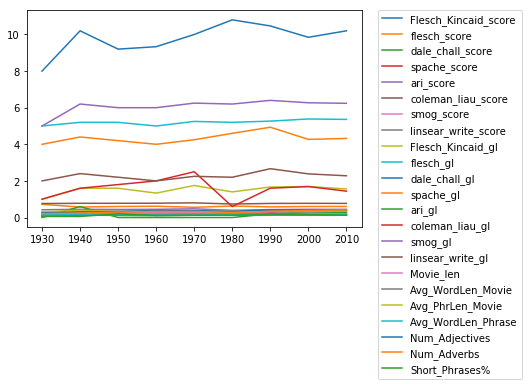

In [72]:
# generale
for i in indexes: 
    
    y=meandf[i]['mean'].values
    x=meandf.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


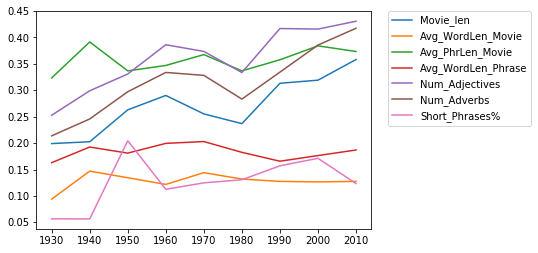

In [79]:
# indici elena
for i in indexes_elena: 
    
    y=meandf_elena[i]['mean'].values
    x=meandf_elena.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


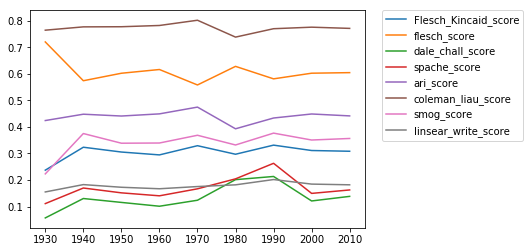

In [118]:
# indici score
for i in indexes_scores: 
    
    y=meandf_scores[i]['mean'].values
    x=meandf_scores.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


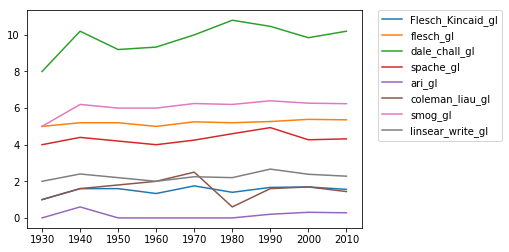

In [78]:
# indici grade level
for i in indexes_gl: 
    
    y=meandf_gl[i]['mean'].values
    x=meandf_gl.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [115]:
# per plottare solo alcune features selezionate 

selected_indexes=[c for c in df_disney.columns if c in ['Movie_len',
 'Avg_WordLen_Movie',
 'Avg_PhrLen_Movie',
 'Avg_WordLen_Phrase',
 'Num_Adjectives',
 'Num_Adverbs',
 #'Short_Phrases%',
 'Flesch_Kincaid_score',
 'ari_score',
 #'coleman_liau_score',
 'smog_score',
 'linsear_write_score']]
meandf_selected=df_disney[selected_indexes+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

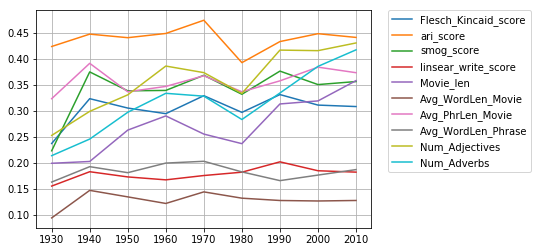

In [117]:
# features selezionate 
for i in selected_indexes: 
 
    y=meandf[i]['mean'].values
    x=meandf.index.values
    plt.subplot()


    plt.plot(x,y, label=i)
    plt.grid(True)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

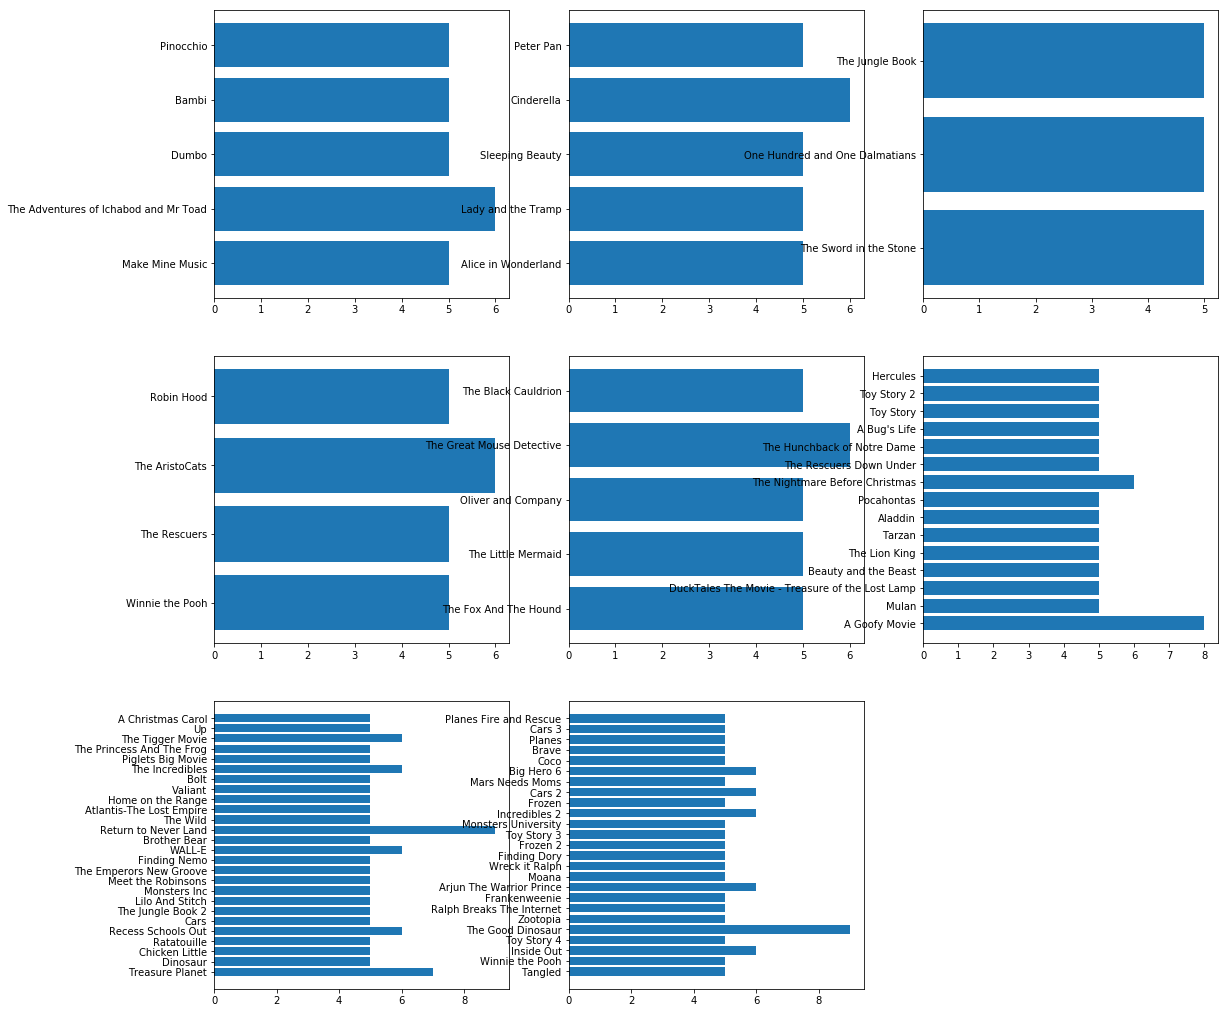

In [76]:
# bar charts per un indice preciso

plt.figure(figsize=(18,18))
#fig, ax = plt.subplots()

i=1
for d in range(1940,2010 +1,10):
    ddf=df_disney[df_disney['Decade']== d]
    # inserire all'interno di ddf[] l'indice selezionato
    x=ddf['flesch_gl'].values
    ax=plt.subplot(3,3,i)  
    movies= ddf['Title'].values
    y_pos = np.arange(len(movies))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(movies)
    length=x
    ax.barh(y_pos, length, align='center')  
        
    i+=1
plt.show()  

/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


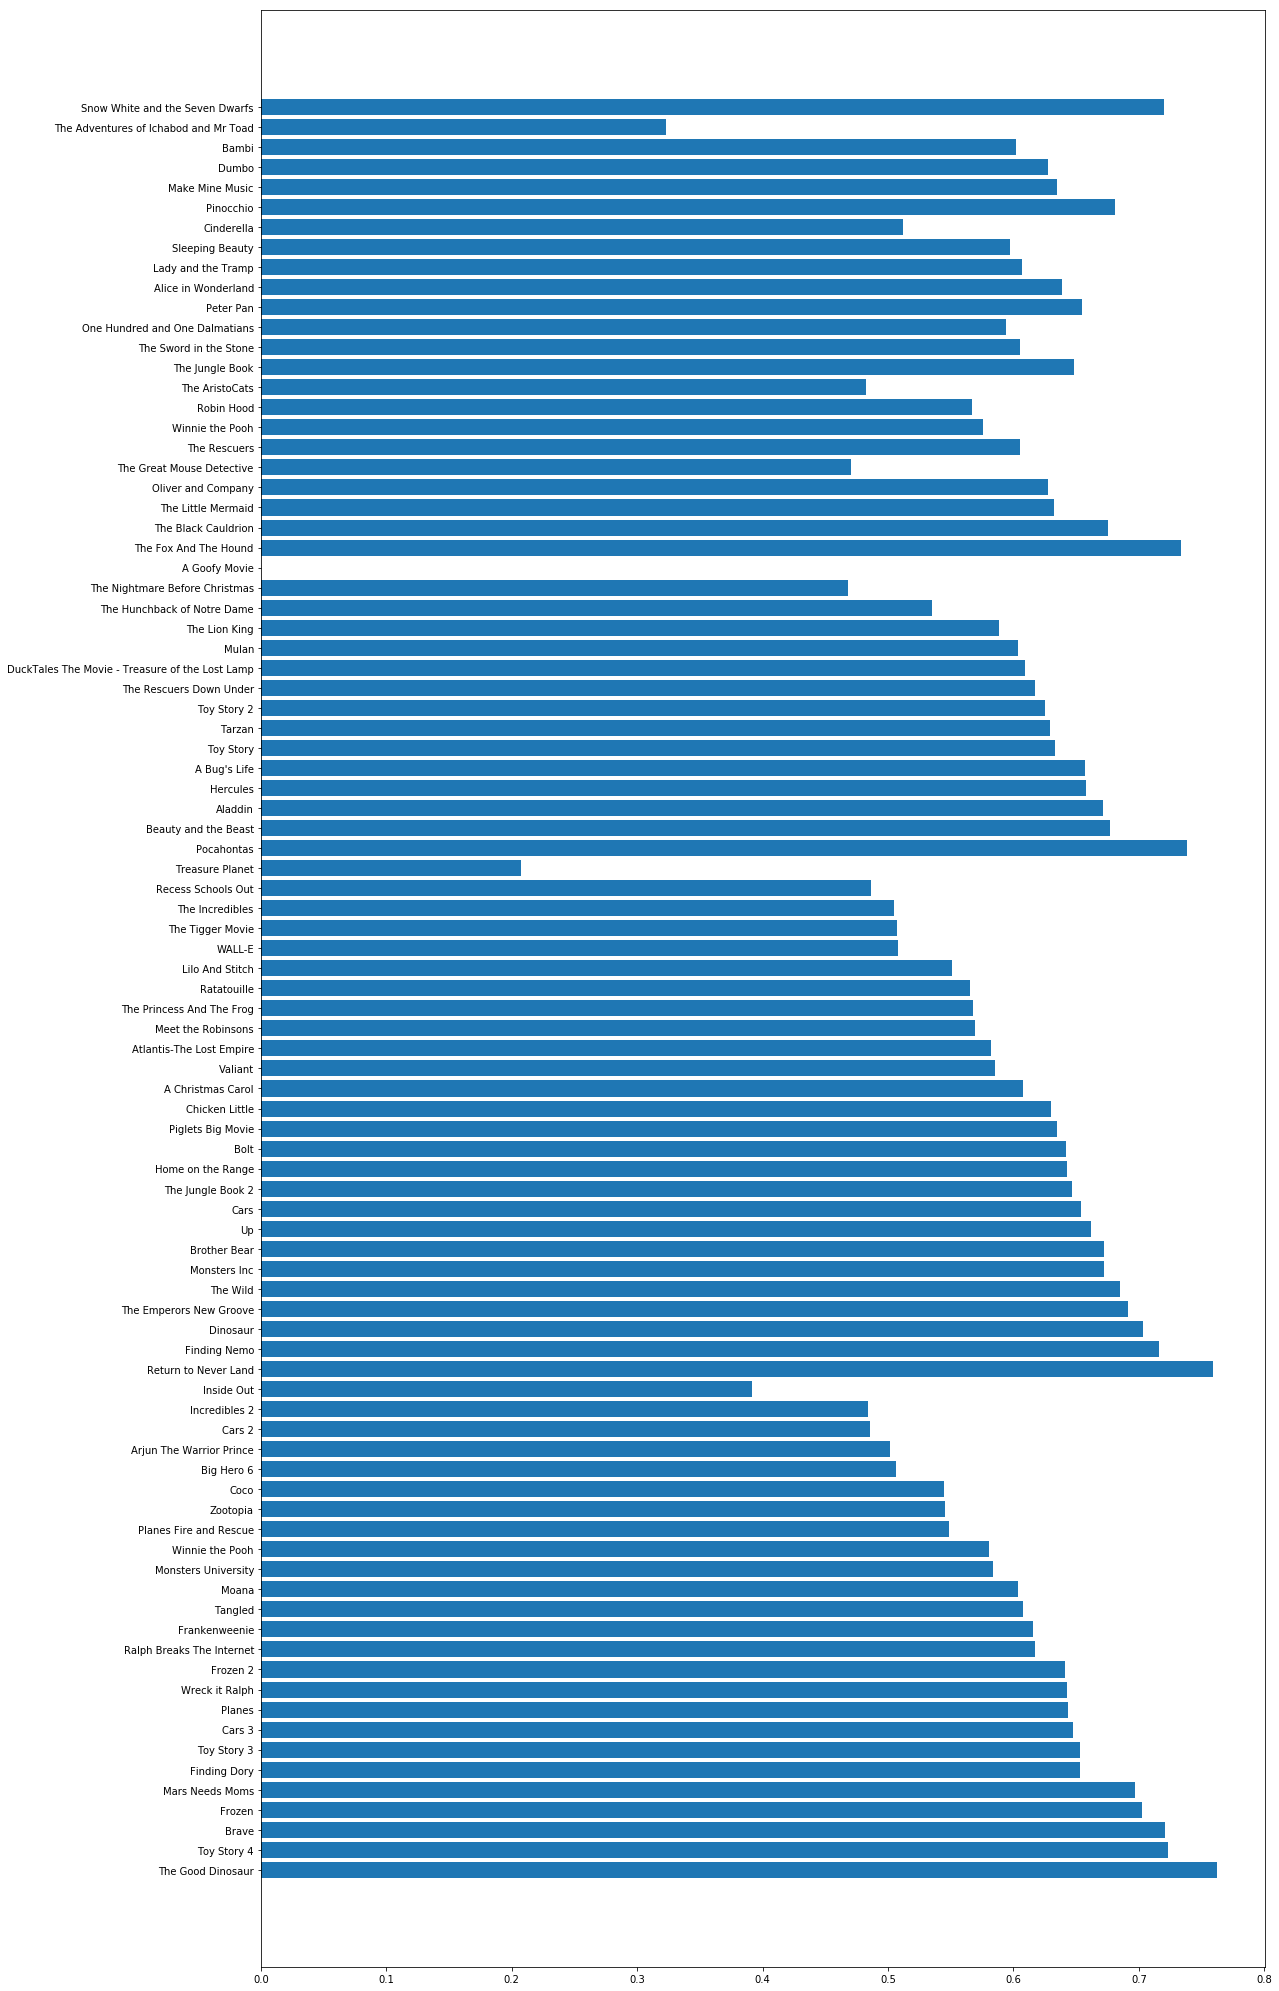

In [88]:
# bar charts generale di indice selezionato su tutti i film

fig, ax = plt.subplots(figsize=(18,36))

                        # diviso per decade e indice selezionato
df_disney.sort_values(by=['Decade','flesch_score'], inplace= True, ascending=False)
           # mettere l'indice selezionato 
x=df_disney['flesch_score'].values 
movies= df_disney['Title'].values
y_pos = np.arange(len(movies))
ax.set_yticks(y_pos)
ax.set_yticklabels(movies)
length=x
ax.barh(y_pos, length, align='center')  

plt.show()  

In [77]:
# per generare il csv
df.to_csv('/Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/COMPLESSITA/general_valeria_elena.csv')